<a href="https://colab.research.google.com/github/ShotaSasaki-HU/text-difficulty-assessor/blob/main/difficulty_of_the_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing（環境の準備）

## Importing Libraries

In [28]:
import pandas as pd
import re
import matplotlib.pyplot as plt


## Reading "group_work_text.csv"
この文章に対するスコアを予測したい．

In [35]:
path_csv = "https://github.com/ShotaSasaki-HU/text-difficulty-assessor/raw/refs/heads/main/group_work_text.csv"
df_group_work_text = pd.read_csv(path_csv, encoding="utf-8", header=0)
df_group_work_text


,docid,text
0,doc01,There are four seasons in a year. They are spr...
1,doc02,The public library is a very quiet place. It i...
2,doc03,Many people want to build better habits. They ...
3,doc04,Many people enjoy growing a garden in their ya...
4,doc05,Many people want to use their time better. The...
5,doc06,Waiting is part of daily life. People wait for...
6,doc07,Getting enough sleep is essential for maintain...
7,doc08,Rules are created to provide order and reduce ...
8,doc09,Electricity is a power that has changed human ...
9,doc10,Electric cars are becoming very popular around...


## Reading "cefr_leveled_texts.csv"（教師データ）

In [29]:
path_csv = "https://github.com/ShotaSasaki-HU/text-difficulty-assessor/raw/refs/heads/main/cefr_leveled_texts.csv"
df = pd.read_csv(path_csv, encoding="utf-8", header=0)
df


,text,label
0,Hi!\nI've been meaning to write for ages and f...,B2
1,﻿It was not so much how hard people found the ...,B2
2,Keith recently came back from a trip to Chicag...,B2
3,"The Griffith Observatory is a planetarium, and...",B2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2
...,...,...
1489,Light propagating in the vicinity of astrophys...,C2
1490,Future of dentistry has become one of the most...,C2
1491,﻿The forests – and suburbs – of Europe are ech...,C2
1492,Hedge funds are turning bullish on oil once ag...,C2


In [30]:
# ユニークなラベルの確認
df['label'].unique()


array(['B2', 'A2', 'C1', 'B1', 'A1', 'C2'], dtype=object)

# Response Variable（目的変数）

In [31]:
# Convert CEFR to numerical values
mapping = {"A1": 1, "A2": 2, "B1": 3, "B2": 4, "C1": 5, "C2": 6}
df['label'] = df['label'].map(mapping)
df


,text,label
0,Hi!\nI've been meaning to write for ages and f...,4
1,﻿It was not so much how hard people found the ...,4
2,Keith recently came back from a trip to Chicag...,4
3,"The Griffith Observatory is a planetarium, and...",4
4,-LRB- The Hollywood Reporter -RRB- It's offici...,4
...,...,...
1489,Light propagating in the vicinity of astrophys...,6
1490,Future of dentistry has become one of the most...,6
1491,﻿The forests – and suburbs – of Europe are ech...,6
1492,Hedge funds are turning bullish on oil once ag...,6


# Explanatory Variable（説明変数）

## １. Average Sentence Length in a Single Document（単一ドキュメントにおける文長の平均）

### Create the Column

In [32]:
def mean_sentence_length(text):
    if pd.isna(text):
        return None

    # 文の分割（. or ? or !）
    sentences = re.split(r'[.!?]+', text)

    # 前後端の空白を削除
    sentences = [s.strip() for s in sentences if s.strip()]
    if len(sentences) == 0:
        return 0

    # 各文の単語数
    lengths = [len(s.split()) for s in sentences]

    return sum(lengths) / len(lengths)

df['mean_sentence_length'] = df['text'].apply(mean_sentence_length)
df.head(5)


,text,label,mean_sentence_length
0,Hi!\nI've been meaning to write for ages and f...,4,17.653846
1,﻿It was not so much how hard people found the ...,4,19.371429
2,Keith recently came back from a trip to Chicag...,4,16.857143
3,"The Griffith Observatory is a planetarium, and...",4,17.705882
4,-LRB- The Hollywood Reporter -RRB- It's offici...,4,17.650000


### Scatter Plot

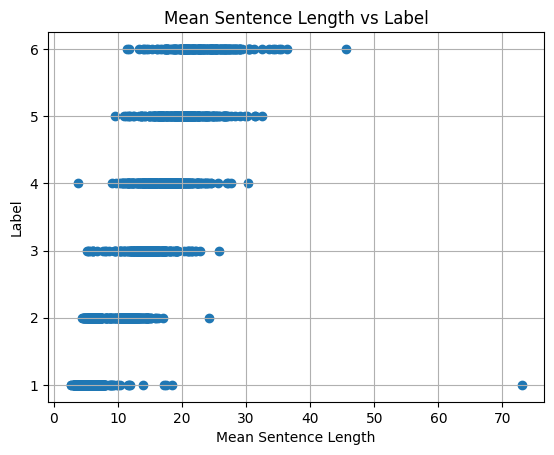

In [33]:
plt.figure()
plt.scatter(df['mean_sentence_length'], df['label'])
plt.xlabel('Mean Sentence Length')
plt.ylabel('Label')
plt.title('Mean Sentence Length vs Label')
plt.grid()
plt.show()


### Outlier Removal（外れ値の除去）

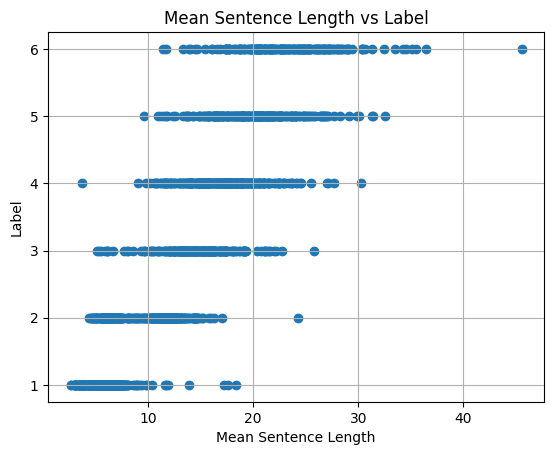

In [34]:
df[(df['label'] == 1) & (df['mean_sentence_length'] > 70)]
df = df.drop(index=1113)

plt.figure()
plt.scatter(df['mean_sentence_length'], df['label'])
plt.xlabel('Mean Sentence Length')
plt.ylabel('Label')
plt.title('Mean Sentence Length vs Label')
plt.grid()
plt.show()


## ２. ***

# Training a Linear Multiple Regression Model（線形重回帰モデルの訓練）